<a href="https://colab.research.google.com/github/pathakaw/pytorch/blob/main/mnist_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([ transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                    ])

training_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
validation_ds = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_ds, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_ds, batch_size=100, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


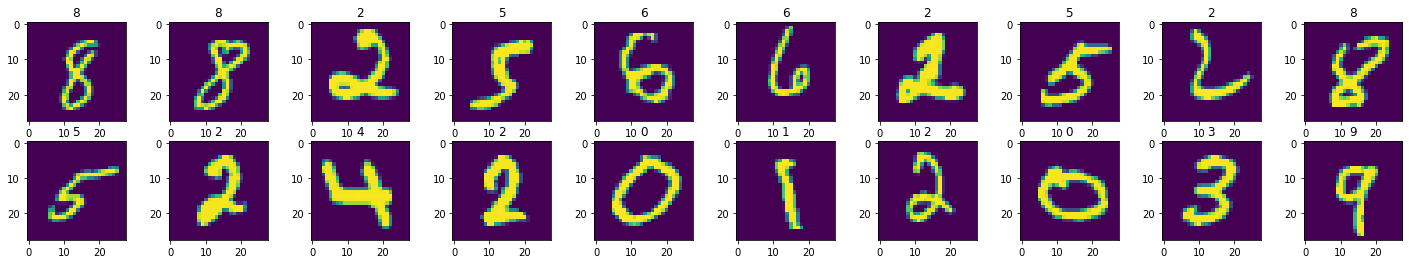

In [3]:
dataiter = iter(training_loader)
fig = plt.figure(figsize=(25,4))
images, labels = dataiter.next()

for idx in range(20):
    ax  = fig.add_subplot(2, 10, idx+1)
    plt.imshow(images[idx].view(28,28))
    ax.set_title(labels[idx].item())

In [4]:

class Classifier(nn.Module):    
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))  
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
model = Classifier(784, 125, 65, 10)
model


Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [7]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0

    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
        
        epoch_loss = running_loss/len(training_loader)
        epoch_acc = running_corrects.float()/ len(training_loader)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc)
        
        val_epoch_loss = val_running_loss/len(validation_loader)
        val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)
        print('epoch :', (e+1))
        print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
        print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.9406, acc 77.8683 
validation loss: 0.4255, validation acc 88.6800 
epoch : 2
training loss: 0.3837, acc 89.1933 
validation loss: 0.3324, validation acc 90.5100 
epoch : 3
training loss: 0.3263, acc 90.5667 
validation loss: 0.3030, validation acc 91.0400 
epoch : 4
training loss: 0.2963, acc 91.4517 
validation loss: 0.2753, validation acc 91.9100 
epoch : 5
training loss: 0.2728, acc 92.1117 
validation loss: 0.2541, validation acc 92.7800 
epoch : 6
training loss: 0.2521, acc 92.6467 
validation loss: 0.2372, validation acc 93.1700 
epoch : 7
training loss: 0.2316, acc 93.4517 
validation loss: 0.2178, validation acc 93.7000 
epoch : 8
training loss: 0.2133, acc 93.9667 
validation loss: 0.2065, validation acc 93.9600 
epoch : 9
training loss: 0.1971, acc 94.3583 
validation loss: 0.1923, validation acc 94.4700 
epoch : 10
training loss: 0.1831, acc 94.7300 
validation loss: 0.1778, validation acc 94.7200 
epoch : 11
training loss: 0.1703, acc 95.1067 
va

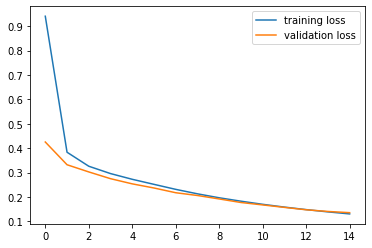

In [8]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

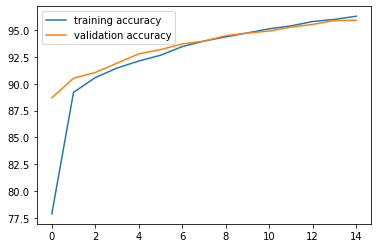

In [9]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()